# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [15]:
import pandas as pd
from matplotlib import pyplot
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [12]:
print(data[data.race=='w'])

       id   ad  education  ofjobs  yearsexp  honors  volunteer  military  \
0       b    1          4       2         6       0          0         0   
1       b    1          3       3         6       0          1         1   
4       b    1          3       3        22       0          0         0   
5       b    1          4       2         6       1          0         0   
6       b    1          4       2         5       0          1         0   
11      b    1          4       4         8       0          0         0   
13      b    1          4       2         4       0          0         0   
15      b    1          1       3         4       0          0         0   
16      b    1          4       3         5       0          1         0   
18      b    1          4       2         6       1          1         0   
21      b    1          4       3         3       0          0         0   
22      b    1          2       2         2       0          0         0   
23      b   

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

# 1 What test is appropriate for this problem? Does CLT apply?
Yes! For CLT to be applicable 1) the observations must be independent which it is. 2) the sample size should be significantly high which it is in this case. n(p)>10 and n(1-p)>10
So CLT is applicable.

# 2 What are the null and alternate hypotheses?
H0 : The probability of callback is same for white and black sounding names i.e p_b = p_w H1 : the probability of callback is different for black and white sounding names p_b != p_w

In [4]:
w = data[data.race=='w']
b = data[data.race=='b']

In [9]:
print(w)

       id   ad  education  ofjobs  yearsexp  honors  volunteer  military  \
0       b    1          4       2         6       0          0         0   
1       b    1          3       3         6       0          1         1   
4       b    1          3       3        22       0          0         0   
5       b    1          4       2         6       1          0         0   
6       b    1          4       2         5       0          1         0   
11      b    1          4       4         8       0          0         0   
13      b    1          4       2         4       0          0         0   
15      b    1          1       3         4       0          0         0   
16      b    1          4       3         5       0          1         0   
18      b    1          4       2         6       1          1         0   
21      b    1          4       3         3       0          0         0   
22      b    1          2       2         2       0          0         0   
23      b   

In [5]:
# Your solution to Q3 here
# probabilites of getting a call back
pr_w = np.sum(w.call) / len(w)
pr_b = np.sum(b.call) / len(b)
print(pr_w)
print(pr_b)
percent_diff = ((pr_w - pr_b) / pr_b) *100
print(percent_diff)

0.09650924024640657
0.06447638603696099
49.681528662420384


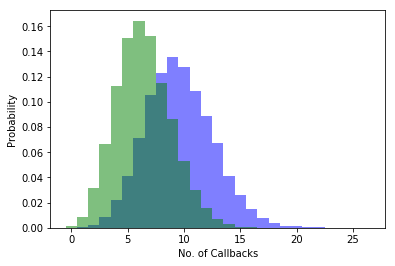

9.5922
6.4319


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
w_call = np.random.binomial(n=100, p=pr_w, size=10000)
b_call = np.random.binomial(n=100, p=pr_b, size=10000)
bins_n_w = np.arange(0, max(w_call) + 4) - 0.5
bins_n_b = np.arange(0, max(b_call) + 4) - 0.5
plt.hist(w_call, bins=bins_n_w, density =True, color='blue', alpha=0.5)
plt.hist(b_call, bins=bins_n_b, density =True, color='green', alpha=0.5)
plt.xlabel('No. of Callbacks')
plt.ylabel('Probability')
plt.show()
print(np.mean(w_call))
print(np.mean(b_call))

In [21]:
p1 = sum(data.call[data.race=='w'])/sum(data.race=='w')
n1 = sum(data.race=='w')

# p2 is the callback rate for the black-sounding names
p2 = sum(data.call[data.race=='b'])/sum(data.race=='b')
n2 = sum(data.race=='b')

satisfied = (n1*p1 >= 5) & (n1*(1-p1) >= 5) & (n2*p2 >= 5) & (n2*(1-p2) >= 5)

print('CLT conditions satisfied:',  satisfied)

CLT conditions satisfied: True


In [22]:
# test statistic here is prop difference
prop_diff = p1-p2
pc = (n1 * p1 + n2 * p2)/ (n1 + n2)
sigma = np.sqrt(pc*(1-pc)/n1 + pc*(1-pc)/n2)

print('prop_diff: ', prop_diff)
print('standard deviation: ', sigma)

# generic formula to get z score:  (test statistic - hypothesized value)/ (stand. deviation of statistic)
z = (p1-p2 -0) / sigma
print('\nz score: ', z)

# p value area of the curve for the specified z value
# (1 - (area of curve above z value) * 2
p = (1 - stats.norm.cdf(z)) * 2
print('p value: ', p)

prop_diff:  0.032032854209445585
standard deviation:  0.007796894036170457

z score:  4.108412152434346
p value:  3.983886837577444e-05


Since p value < 0.05, the data is statistically significant at the significance level of 𝛂 = 0.05 and we reject H0 in favor of H1. It means that there is convincing evidence that there is difference between callback rates for white-sounding vs black-sounding named resumes

In [23]:
# z_critical at 95%
z_critical = stats.norm.ppf(q=0.975)
print('z_critical: ', z_critical)

# margin of error
moe = z_critical * sigma
print('\nmargin of error: ', moe)

# confidence interval
ci = (prop_diff-moe, prop_diff+moe)
print('95% confidence interval: ', ci)

z_critical:  1.959963984540054

margin of error:  0.015281631502169232
95% confidence interval:  (0.01675122270727635, 0.04731448571161482)


C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


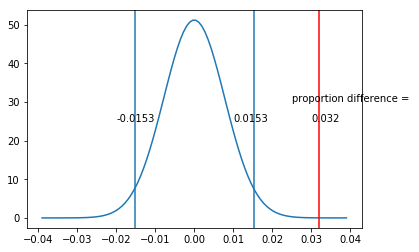

In [24]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
x = np.linspace(-5 * sigma, 5 * sigma, 100)
plt.plot(x, mlab.normpdf(x,0,sigma))
plt.axvline(moe)
plt.axvline(-moe)
plt.axvline(prop_diff,color='red')
plt.annotate(np.round(moe,4), (0.01,25))
plt.annotate(-np.round(moe,4), (-0.02,25))
plt.annotate('proportion difference = ', (0.025,30))
plt.annotate(np.round(prop_diff,4), (0.03,25))
plt.show()

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

# 4 
Racial discrimination is widespread in various cultures as well as in the labor markets. This phenomena has been studied in the United States labor market where the researchers randomly assigned identical resumes to black-sounding and white-sounding names. After analyzing the data of such study, there is overwhelming statistical evidence which indicates that there is correlation between the amount of callbacks and the individual's race. Unfortunately, black-sounding names receive less callbacks than white-sounding names. In this particular study, white-sounding names were 50% more likely to receive a callback. Race is definitely not the only deciding factor, but it does present to be an obstacle to hard working individuals who may, at minimum, qualify for a callback. Perhaps, employers should focus on the credentials of the individual and make their decision before even looking at the person's name. This would, in theory, help eliminate discrimination based on race.

# 5
By no means is race the most important factor in callback decision. Most likely, there are numerous factors that come in to play when deciding on which individual to callback for an interview. These factors whould need to be tested just as the race factor was tested earlier. Each factor can be tested for the rate of callbacks to identify statistical significance, if any.